<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Ajuste de curvas </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Encontrar beta_0 y beta_1 resolviendo el sistema
A = np.array([[1,0],
              [1,1]])
b = np.array([1,0]) 


In [3]:
# beta = A^-1 * b
beta = np.linalg.inv(A).dot(b)
beta

array([ 1., -1.])

In [4]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [5]:
np.linalg.solve(A,b)

array([ 1., -1.])

#### y = b0 + b1x
#### y = 1 - x

In [6]:
beta[0], beta[1]

(1.0, -1.0)

$$ y=1 + -x $$

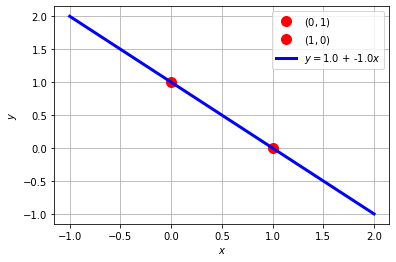

In [7]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(0,1,'ro',ms=10,label='$(0,1)$')
plt.plot(1,0,'ro',ms=10,label='$(1,0)$')
x_num = np.linspace(-1,2)
y_num = beta[0] + beta[1]*x_num # y=b0 + b1x

plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [8]:
# Encontrar beta_0, beta_1 y beta_2
A = np.array([[1,-1,1],
             [1,0,0],
             [1,1,1]])
b = np.array([1,0,1])

In [9]:
beta = np.linalg.inv(A).dot(b)
beta

array([0., 0., 1.])

In [10]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be squa

In [11]:
#Método de solucion de ecuaciones (como entrada se necesitan matrices y vectores)
beta = np.linalg.solve(A,b)
beta

array([0., 0., 1.])

$y = x^2 $

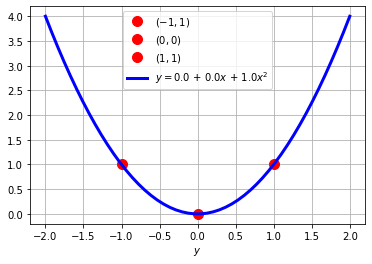

In [12]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(-1,1,'ro',ms=10,label='$(-1,1)$')
plt.plot(0,0,'ro',ms=10,label='$(0,0)$')
plt.plot(1,1,'ro',ms=10,label='$(1,1)$')

x_num = np.linspace(-2,2)
y_num = beta[0] + beta[1]*x_num + beta[2]*x_num**2

plt.plot(x_num,y_num, 'b',lw=3, label=f'$y=${np.round(beta[0],2)} + {np.round(beta[1],2)}$x$ + {np.round(beta[2],2)}$x^2$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [13]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N=100
x=np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0,scale=2,size=(N,))


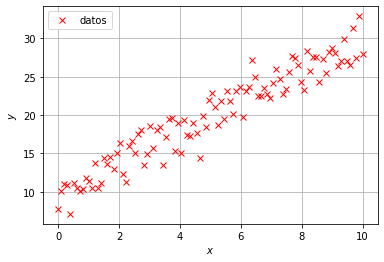

In [14]:
# Graficar
plt.figure(figsize=(6,4))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes ${\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los ${\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza

$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]{\beta})^2=\frac{1}{2n}\left|\left|{y}-{X}{\beta}\right|\right|^2,$$

donde ${y}=\left[y_1\quad\dots\quad y_n\right]^T$, y ${X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$${\beta}^{ls} = \arg \min_{{\beta}} \left|\left|{y}-{X}{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [15]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [16]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [17]:
# Definir funcion objetivo y punto inicial (xi_points,yi_points), n_points
def min_sqe(beta,x_points,y_points):
    n = len(x_points)
    #función objetivo (función de costo) error cuadrático medio
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [18]:
beta_ini = [0,0]

In [19]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [20]:
y

array([ 7.78334119, 10.1367689 , 10.97718314, 10.94712944,  7.12193604,
       11.10856404, 10.51148758, 10.07846153, 10.3339879 , 11.80292678,
       11.38346361, 10.49027846, 13.73509894, 10.56065702, 11.17566718,
       14.3662922 , 13.63278089, 14.51232491, 12.9718179 , 15.11726408,
       16.34177013, 12.27688635, 11.24569426, 15.97509535, 16.58200012,
       15.02531516, 17.52697613, 18.0832338 , 13.55326437, 14.93472239,
       18.589466  , 15.7552703 , 18.05959073, 18.40760633, 13.47145139,
       17.08186381, 19.42757223, 19.63664354, 15.34639604, 18.98798664,
       15.02366042, 19.40720375, 17.36556542, 17.23243036, 18.96017837,
       17.63563504, 14.39382925, 19.86286014, 18.50696085, 21.90703794,
       22.83020674, 21.1001861 , 18.71335266, 21.89651383, 19.50286762,
       23.15111315, 21.81121056, 20.17526467, 23.18245145, 23.61929226,
       19.69157802, 23.20242404, 23.70815444, 27.18993624, 24.9563922 ,
       22.43505882, 22.4817648 , 23.52544645, 22.81117356, 22.21

In [21]:
solucion = opt.minimize(fun=min_sqe, x0=beta_ini, args=(x,y))
solucion

      fun: 1.5889462531316227
 hess_inv: array([[ 3.86531029, -0.5736931 ],
       [-0.5736931 ,  0.11485958]])
      jac: array([ 1.04308128e-07, -3.26335430e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([9.84544386, 2.0059963 ])

In [22]:
beta = solucion.x
beta

array([9.84544386, 2.0059963 ])

$$\hat{f(x)}=9.59 + 2.05*x$$

¿Qué tan bien luce el ajuste?

In [23]:
# Coeficientes \beta_0 y \beta_1
beta

array([9.84544386, 2.0059963 ])

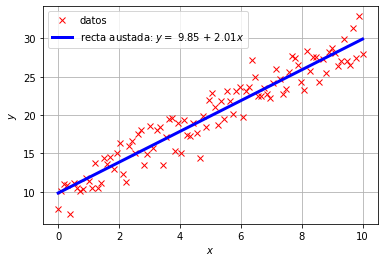

In [24]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')
f_hat = beta[0] + beta[1]*x

plt.plot(x,f_hat,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta[0],2)} + {np.round(beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Note que la pendiente es aproximadamente $2$ y el intercepto es aproximadamente $10$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [25]:
# Generamos 100 puntos ruidosos a partir de una senoidal
N=100
x=np.linspace(0,1,N)
y=np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3, size=(N,))


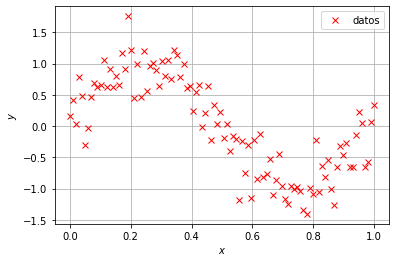

In [26]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.1. ¿Se ajustará bien una recta?

In [27]:
# Definir funcion objetivo y semilla
# Definir funcion objetivo y punto inicial (xi_points,yi_points), n_points
def min_sqe_1(beta,x_points,y_points):
    n = len(x_points)
    #función objetivo (función de costo) error cuadrático medio
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe
beta_ini_1 =[0,0]

In [28]:
# Resolver
sol1 = opt.minimize(fun=min_sqe_1, x0=beta_ini_1, args=(x,y))
sol1

      fun: 0.14575740251606
 hess_inv: array([[ 3.71535254, -5.49094272],
       [-5.49094272, 11.08625177]])
      jac: array([ 8.49366188e-06, -5.10737300e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 0.94876778, -1.88004389])

**Veamos $\beta$ para el ajuste con recta**

In [29]:
beta_1 = sol1.x
beta_1

array([ 0.94876778, -1.88004389])

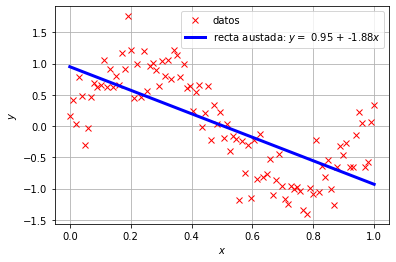

In [30]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')
f_hat_1 = beta_1[0] + beta_1[1]*x

plt.plot(x,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [31]:
# Definir funcion objetivo y semilla
def min_sqe_2(beta,x_points,y_points):
    n = len(x_points)
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [32]:
beta_ini_2 = [0,0,0]

In [33]:
# Resolver
sol2 = opt.minimize(fun=min_sqe_2, x0=beta_ini_2, args=(x,y))
sol2

      fun: 0.14511069834642637
 hess_inv: array([[   8.47131159,  -34.274304  ,   28.67828092],
       [ -34.274304  ,  184.58477895, -173.13646401],
       [  28.67828092, -173.13646401,  172.81170012]])
      jac: array([-7.39470124e-07, -4.97326255e-07, -3.81842256e-07])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 16
     njev: 18
   status: 0
  success: True
        x: array([ 1.02674512, -2.3529584 ,  0.47302303])

**Veamos $\beta$ para el ajuste con parábola**

In [34]:
# Mostrar coeficientes
beta_2 = sol2.x
beta_2

array([ 1.02674512, -2.3529584 ,  0.47302303])

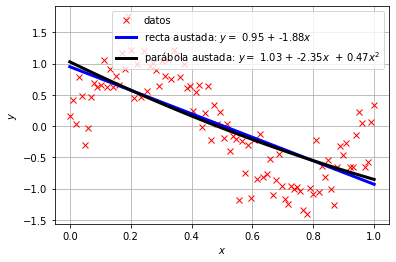

In [35]:
# Graficar recta y parabola ajustadas

plt.figure(figsize=(6,4))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')
f_hat_1 = beta_1[0] + beta_1[1]*x
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2

plt.plot(x,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [36]:
# Definir funcion objetivo y semilla
def min_sqe_3(beta,x_points,y_points):
    n=len(x_points)
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2 + beta[3]*x_points**3
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [37]:
beta_ini_3 = [0,0,0,0]

In [38]:
sol3 = opt.minimize(fun=min_sqe_3, x0=beta_ini_3, args=(x,y))
sol3

      fun: 0.04844189925823263
 hess_inv: array([[   14.34955303,  -108.18745631,   216.59670904,  -126.21851023],
       [ -108.18745631,  1108.24860177, -2511.27058513,  1565.88194737],
       [  216.59670904, -2511.27058513,  6071.76021515, -3942.56723694],
       [ -126.21851023,  1565.88194737, -3942.56723694,  2631.72353204]])
      jac: array([6.14207238e-07, 2.32830644e-07, 2.61235982e-07, 2.69617885e-07])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 32
     njev: 33
   status: 0
  success: True
        x: array([ -0.06882918,  11.13395987, -33.41430073,  22.59156428])

**Veamos $\beta$ para el ajuste con cúbica**

In [39]:
# Mostrar coeficientes
beta_3 = sol3.x
beta_3

array([ -0.06882918,  11.13395987, -33.41430073,  22.59156428])

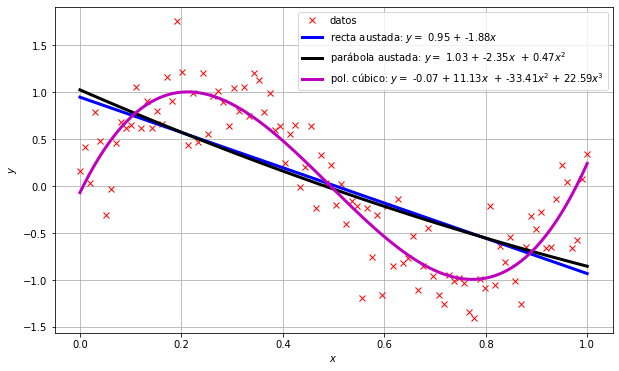

In [40]:
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

f_hat_1 = beta_1[0] + beta_1[1]*x
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3

plt.plot(x,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 7...

In [41]:
# Definimos funcion objetivo y semilla
def min_sqe_7(beta,x_points,y_points):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(8)]).sum(axis=0)
    
    sqe = (1/(2*n))*((y_points-f_hat)**2).sum()
    return sqe
beta_ini_7 = np.zeros(8)

In [42]:
# Resolvemos
sol7 = opt.minimize(fun=min_sqe_7, x0=beta_ini_7, args=(x,y))
sol7

      fun: 0.04570821959216678
 hess_inv: array([[ 2.26758100e+01, -2.91734702e+02,  1.05547953e+03,
        -1.19239738e+03, -2.48094924e+02,  6.88540851e+02,
         5.48014818e+02, -5.84888545e+02],
       [-2.91734702e+02,  5.34865367e+03, -2.27756821e+04,
         2.89163303e+04,  4.70213496e+03, -1.78090704e+04,
        -1.34036391e+04,  1.53909755e+04],
       [ 1.05547953e+03, -2.27756821e+04,  1.06645656e+05,
        -1.45918428e+05, -1.90996132e+04,  9.40096222e+04,
         6.80777199e+04, -8.25047697e+04],
       [-1.19239738e+03,  2.89163303e+04, -1.45918428e+05,
         2.12467991e+05,  2.18075880e+04, -1.42424169e+05,
        -9.96770052e+04,  1.26985190e+05],
       [-2.48094924e+02,  4.70213496e+03, -1.90996132e+04,
         2.18075880e+04,  5.16492152e+03, -1.18706536e+04,
        -9.98492187e+03,  9.48084000e+03],
       [ 6.88540851e+02, -1.78090704e+04,  9.40096222e+04,
        -1.42424169e+05, -1.18706536e+04,  9.80614379e+04,
         6.70457912e+04, -8.8489885

**De nuevo, veamos $\beta$**

In [43]:
# Mostrar coeficientes
beta_7 = sol7.x
beta_7

array([  0.09724841,   6.57378419,  -7.62634328, -21.86714999,
         7.86625666,  23.43655978,  12.01903025, -20.50553043])

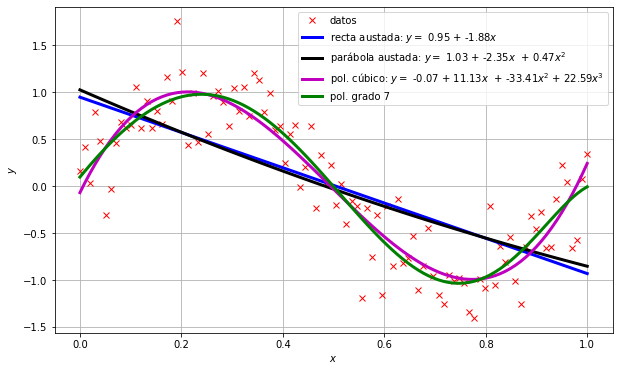

In [44]:
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

f_hat_1 = beta_1[0] + beta_1[1]*x
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
f_hat_7 = np.array([beta_7[i]*x**i for i in range(8)]).sum(axis=0)


plt.plot(x,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         
plt.plot(x,f_hat_7,'g',lw=3,label=f'pol. grado 7')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

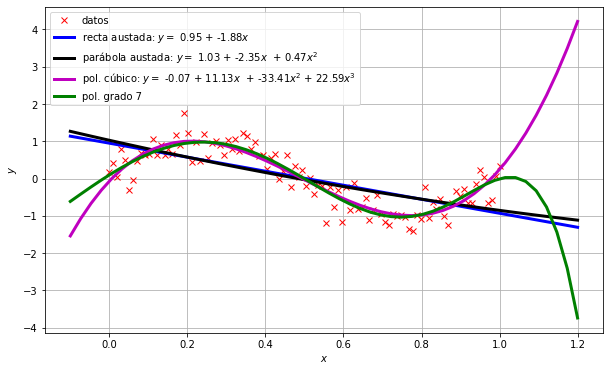

In [45]:
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

x_num = np.linspace(-0.1,1.2)

f_hat_1 = beta_1[0] + beta_1[1]*x_num
f_hat_2 = beta_2[0] + beta_2[1]*x_num + beta_2[2]*x_num**2
f_hat_3 = beta_3[0] + beta_3[1]*x_num + beta_3[2]*x_num**2 + beta_3[3]*x_num**3
f_hat_7 = np.array([beta_7[i]*x_num**i for i in range(8)]).sum(axis=0)


plt.plot(x_num,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x_num,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x_num,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         
plt.plot(x_num,f_hat_7,'g',lw=3,label=f'pol. grado 7')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

In [46]:
# Mostrar coeficientes
beta_7

array([  0.09724841,   6.57378419,  -7.62634328, -21.86714999,
         7.86625666,  23.43655978,  12.01903025, -20.50553043])

In [47]:
# Grafica de ajustes
# Grafica de los puntos y la recta ajustada



In [48]:
def min_sq_N(beta,x_points,y_points,N):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe=(1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [49]:
# Polinomio de grado 8
# Resolvemos
beta_ini_8 = np.zeros(9)
sol8 = opt.minimize(fun=min_sq_N, x0=beta_ini_8, args=(x,y,8))
sol8

      fun: 0.04587820978975756
 hess_inv: array([[ 2.17382133e+01, -2.64659572e+02,  8.94951723e+02,
        -9.01542624e+02, -2.46066263e+02,  3.59211295e+02,
         3.82921759e+02,  5.88855808e+01, -3.07830858e+02],
       [-2.64659572e+02,  4.59378802e+03, -1.82984229e+04,
         2.07296966e+04,  4.91824868e+03, -8.97573361e+03,
        -9.20596156e+03, -1.26034624e+03,  7.83635465e+03],
       [ 8.94951723e+02, -1.82984229e+04,  8.01608107e+04,
        -9.79287618e+04, -2.07299252e+04,  4.49525123e+04,
         4.48838489e+04,  5.48326982e+03, -3.98652829e+04],
       [-9.01542624e+02,  2.07296966e+04, -9.79287618e+04,
         1.27499330e+05,  2.39973130e+04, -6.16600468e+04,
        -6.01111371e+04, -6.42909742e+03,  5.55630209e+04],
       [-2.46066263e+02,  4.91824868e+03, -2.07299252e+04,
         2.39973130e+04,  5.72235944e+03, -1.03221162e+04,
        -1.06434974e+04, -1.54738574e+03,  8.89613850e+03],
       [ 3.59211295e+02, -8.97573361e+03,  4.49525123e+04,
        -

In [50]:
beta_8 = sol8.x
beta_8

array([  0.0748893 ,   7.28937914, -12.48933609, -11.31165085,
         4.99476139,  12.60010367,   9.64689104,   0.36318002,
       -11.18238505])

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [51]:
# Error cuadratico
error = []
for i in range(1,10):
    beta_ini = np.zeros(i+1)
    solucion = opt.minimize(fun=min_sq_N, x0=beta_ini, args=(x,y,i))
    error.append(solucion.fun)


In [52]:
error

[0.14575740251606,
 0.14511069834642637,
 0.04844189925823263,
 0.04842187218025212,
 0.04532978177558313,
 0.04550425959297305,
 0.04570821959216678,
 0.04587820978975756,
 0.045350765076403364]

Text(0, 0.5, 'error cuadrático medio')

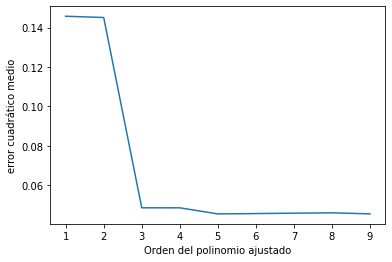

In [53]:
#Plotear la lista de los errores de los ajustes de curvas
plt.figure(figsize=(6,4))
plt.plot(range(1,10),error)
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('error cuadrático medio')

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$${\beta}^{ls} = \arg \min_{{\beta}} \left|\left|{y}-{X}{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos ${\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes ${\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$${\beta}^{ridge} = \arg \min_{{\beta}} \left|\left|{y}-{X}{\beta}\right|\right|^2 + \lambda\left|\left|{\beta}\right|\right|^2$$

In [54]:
def min_sq_N_Ridge(beta,x_points,y_points,N,l):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe_ridge=(1/(2*n))*((y_points - f_hat)**2).sum() + l*np.linalg.norm(beta)**2
    return sqe_ridge

In [55]:
beta_ridge_ini_7 = np.zeros(8)
beta_ridge_ini_7 

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
sol = opt.minimize(fun=min_sq_N_Ridge, x0=beta_ridge_ini_7, args=(x,y,7,0.0003))
sol

      fun: 0.07933551785402446
 hess_inv: array([[   7.983419  ,  -34.08284696,   24.34895617,   16.61006904,
           1.67151432,   -6.49846352,   -7.56197316,   -3.75165135],
       [ -34.08284696,  237.30294967, -272.54742867, -110.25520454,
          58.64892346,  110.156591  ,   63.96342493,  -41.64973835],
       [  24.34895617, -272.54742867,  513.13011183,   58.79368262,
        -269.73463887, -281.66470563,  -61.88710618,  286.23460434],
       [  16.61006904, -110.25520454,   58.79368262,   99.29347017,
          68.28028062,   11.29513798,  -52.01473661, -112.58627576],
       [   1.67151432,   58.64892346, -269.73463887,   68.28028062,
         250.72480557,  195.69019561,  -16.15515886, -308.64888463],
       [  -6.49846352,  110.156591  , -281.66470563,   11.29513798,
         195.69019561,  177.16789371,   13.79482901, -224.7509693 ],
       [  -7.56197316,   63.96342493,  -61.88710618,  -52.01473661,
         -16.15515886,   13.79482901,   33.86857892,   42.80423328],

In [57]:
beta_ridge_7 = sol.x
beta_ridge_7

array([ 0.64052584,  1.47720273, -4.33170246, -2.63812489, -0.21858168,
        1.3478915 ,  2.02254284,  2.06149716])

In [58]:
beta_7

array([  0.09724841,   6.57378419,  -7.62634328, -21.86714999,
         7.86625666,  23.43655978,  12.01903025, -20.50553043])

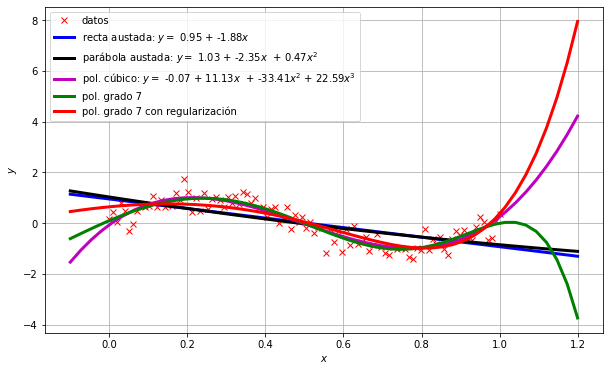

In [59]:
# Grafica de los puntos y la recta ajustada
# Mostrar coeficientes
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

x_num = np.linspace(-0.1,1.2)

f_hat_1 = beta_1[0] + beta_1[1]*x_num
f_hat_2 = beta_2[0] + beta_2[1]*x_num + beta_2[2]*x_num**2
f_hat_3 = beta_3[0] + beta_3[1]*x_num + beta_3[2]*x_num**2 + beta_3[3]*x_num**3
# sin aplicar regularización
f_hat_7 = np.array([beta_7[i]*x_num**i for i in range(8)]).sum(axis=0)
# aplicando regularización (Ridge)
f_hat_7_ridge = np.array([beta_ridge_7[i]*x_num**i for i in range(8)]).sum(axis=0)


plt.plot(x_num,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x_num,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x_num,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         
plt.plot(x_num,f_hat_7,'g',lw=3,label=f'pol. grado 7')         
plt.plot(x_num,f_hat_7_ridge,'r',lw=3,label=f'pol. grado 7 con regularización')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 3.2. Lasso

$${\beta}^{lasso} = \arg \min_{{\beta}} \left|\left|{y}-{X}{\beta}\right|\right|^2 + \lambda\left|\left|{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [60]:
def min_sq_N_Lasso(beta,x_points,y_points,N,l):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe_lasso=(1/(2*n))*((y_points - f_hat)**2).sum() + l*np.abs(beta).sum()
    return sqe_lasso

In [61]:
beta_ini_7_lasso = np.zeros(8)

In [62]:
sol = opt.minimize(fun=min_sq_N_Lasso, x0=beta_ini_7_lasso, args=(x,y,7,0.0003))
sol

      fun: 0.06060856347053399
 hess_inv: array([[ 1.12547570e+01, -8.08322076e+01,  1.39690273e+02,
         1.67585802e-03, -7.81738138e+01, -4.16831115e+01,
        -2.52053278e-01,  4.82300578e+01],
       [-8.08322076e+01,  8.52457911e+02, -1.73003817e+03,
         3.16845632e-02,  1.18686208e+03,  5.83113527e+02,
         6.25817991e+00, -8.23816350e+02],
       [ 1.39690273e+02, -1.73003817e+03,  3.84587634e+03,
        -1.49775235e-01, -3.00098385e+03, -1.40325406e+03,
        -1.71736220e+01,  2.21918233e+03],
       [ 1.67585802e-03,  3.16845632e-02, -1.49775235e-01,
         4.75343236e-03,  1.98643685e-01,  7.79167168e-02,
         4.46964856e-03, -1.77985793e-01],
       [-7.81738138e+01,  1.18686208e+03, -3.00098385e+03,
         1.98643685e-01,  2.81960090e+03,  1.22757698e+03,
         1.48364463e+01, -2.26586621e+03],
       [-4.16831115e+01,  5.83113527e+02, -1.40325406e+03,
         7.79167168e-02,  1.22757698e+03,  5.50821718e+02,
         6.78363388e+00, -9.5550023

In [63]:
beta_7_lasso=sol.x
beta_7_lasso

array([ 1.87210051e-01,  6.75681237e+00, -1.62451114e+01,  9.42641447e-06,
        6.23309009e+00,  4.45700252e+00, -2.38360642e-09, -1.07286869e+00])

In [64]:
beta_ridge_7

array([ 0.64052584,  1.47720273, -4.33170246, -2.63812489, -0.21858168,
        1.3478915 ,  2.02254284,  2.06149716])

In [65]:
beta_7

array([  0.09724841,   6.57378419,  -7.62634328, -21.86714999,
         7.86625666,  23.43655978,  12.01903025, -20.50553043])

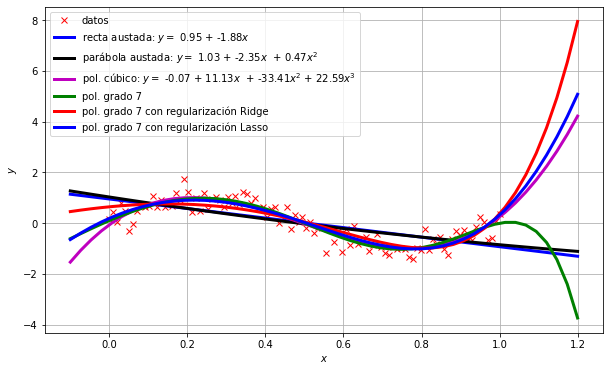

In [66]:
# Graficar los modelos obtenidos de grado 7 (con regularización: lasso, ridge)
# Graficar recta, parabola y cubica
plt.figure(figsize=(10,6))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')

x_num = np.linspace(-0.1,1.2)

f_hat_1 = beta_1[0] + beta_1[1]*x_num
f_hat_2 = beta_2[0] + beta_2[1]*x_num + beta_2[2]*x_num**2
f_hat_3 = beta_3[0] + beta_3[1]*x_num + beta_3[2]*x_num**2 + beta_3[3]*x_num**3
# sin aplicar regularización
f_hat_7 = np.array([beta_7[i]*x_num**i for i in range(8)]).sum(axis=0)
# aplicando regularización (Ridge)
f_hat_7_ridge = np.array([beta_ridge_7[i]*x_num**i for i in range(8)]).sum(axis=0)
# aplicando regularización (Lasso)
f_hat_7_lasso = np.array([beta_7_lasso[i]*x_num**i for i in range(8)]).sum(axis=0)


plt.plot(x_num,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_1[0],2)} + {np.round(beta_1[1],2)}$x$')
plt.plot(x_num,f_hat_2,'k',lw=3,label=f'parábola austada: $y=$ {np.round(beta_2[0],2)} + {np.round(beta_2[1],2)}$x$  + {np.round(beta_2[2],2)}$x^2$')
plt.plot(x_num,f_hat_3,'m',lw=3,label=f'pol. cúbico: $y=$ {np.round(beta_3[0],2)} + {np.round(beta_3[1],2)}$x$  + {np.round(beta_3[2],2)}$x^2$ + {np.round(beta_3[3],2)}$x^3$')         
plt.plot(x_num,f_hat_7,'g',lw=3,label=f'pol. grado 7')         
plt.plot(x_num,f_hat_7_ridge,'r',lw=3,label=f'pol. grado 7 con regularización Ridge')         
plt.plot(x_num,f_hat_7_lasso,'b',lw=3,label=f'pol. grado 7 con regularización Lasso')         


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()



## 4. Actividad

La siguiente celda lee datos correspondientes a tamaños $x$ ($ft^2$) y precios $y$ (USD) de casas en Portland, Oregon.

1. Graficar estos datos poniendo los precios en el eje $y$ y los tamaños en el eje $x$.
2. Ajustar polinomios de grado 1 hasta grado 5.
3. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado sea el menor posible.
4. Supongamos que un amigo tuyo tiene una casa de $1250 ft^2$. Según tu modelo, ¿en cuánto podría vender dicha casa?


In [67]:
import pandas as pd
data = pd.read_csv('housing_prices.csv')


In [68]:
data.head()

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 1

In [75]:
x = data['size'].values
y = data['price'].values

In [77]:
x

array([2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
       2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
       1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
       3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
        852, 1852, 1203], dtype=int64)

In [78]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

In [80]:
len(x)

47

In [81]:
len(y)

47

Text(0, 0.5, 'precio')

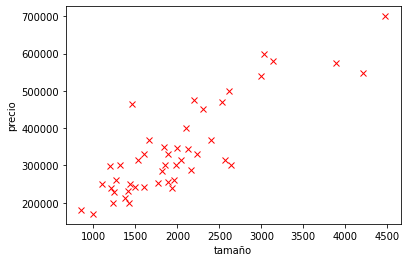

In [84]:
plt.figure(figsize=(6,4))
#plt.scatter(x,y)
plt.plot(x,y,'xr', label='datos')
plt.xlabel('tamaño')
plt.ylabel('precio')

## 2

In [85]:
def min_sq_N(beta,x_points,y_points,N):
    n=len(x_points)
    f_hat = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    sqe=(1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [89]:
error = []
sol_ajuste = []
n_pol = 5
for i in range(1,n_pol+1):
    beta_ini = np.zeros(i+1)
    solucion = opt.minimize(fun=min_sq_N, x0=beta_ini, args=(x,y,i))
    sol_ajuste.append(solucion.x)
    error.append(solucion.fun)


In [91]:
error

[2058134064.9922478,
 2057645057.7227497,
 2006255639.2897644,
 65591548106.45744,
 65591548106.45744]

In [90]:
sol_ajuste

[array([71129.77955991,   134.58654786]),
 array([ 6.51332862e+04,  1.40194722e+02, -1.12636663e-03]),
 array([ 2.41498158e+05, -1.21648489e+02,  1.14274015e-01, -1.50636878e-05]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.])]

## 3 

Text(0, 0.5, 'error cuadrático medio')

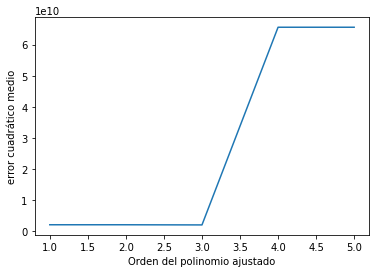

In [93]:
plt.figure(figsize=(6,4))
plt.plot(range(1,n_pol+1),error)
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('error cuadrático medio')

## 4

In [97]:
beta_mod = sol_ajuste[0]
beta_mod[0], beta_mod[1]

(71129.77955991149, 134.5865478605229)

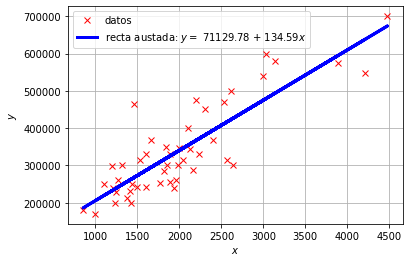

In [98]:
plt.figure(figsize=(6,4))
#plt.scatter(x,y,label='datos')
plt.plot(x,y,'xr',label='datos')
f_hat_1 = beta_mod[0] + beta_mod[1]*x

plt.plot(x,f_hat_1,'b',lw=3,label=f'recta austada: $y=$ {np.round(beta_mod[0],2)} + {np.round(beta_mod[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

In [99]:
f_hat_1250 = beta_mod[0] + beta_mod[1]*1250
f_hat_1250

239362.9643855651

In [100]:
x_values = np.array([1250, 2000, 3000])
f_hat_values = beta_mod[0] + beta_mod[1]*x_values
f_hat_values

array([239362.96438557, 340302.87528096, 474889.42314148])

# Avisos:

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Algún integrante del equipo me deberá mandar un mensaje por MSTeams con los nombres de los integrantes.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Tendrán que mandarme un mensaje con su tema de proyecto. Juntos, definiremos el alcance.
### 4. Fecha de entrega y presentación: por definir

# 6 Marzo 2023 Examen modulo 1, 16 marzo de 2023 Presentación del proyecto